<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(3_6)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.6_n250.csv',
 'data_multi_delta_3.6_n20.csv',
 'data_multi_delta_3.6_n120.csv',
 'data_multi_delta_3.6_n60.csv',
 'data_multi_delta_3.6_n30.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,20.207471,126.228253,156.435724,-91.109593,247.545317
1,0.0,1.0,26.315690,-414.373688,-378.057998,-59.227327,-318.830671
2,0.0,2.0,43.118523,70.486181,123.604704,28.476204,95.128500
3,0.0,3.0,53.958637,3032.432928,3096.391565,85.056920,3011.334645
4,0.0,4.0,50.921520,1308.761428,1369.682948,69.204480,1300.478468
...,...,...,...,...,...,...,...
249995,999.0,245.0,97.206459,692.721111,799.927570,326.119228,473.808343
249996,999.0,246.0,77.195325,429.834669,517.029995,196.774336,320.255659
249997,999.0,247.0,89.799846,-4168.026988,-4068.227142,278.245498,-4346.472640
249998,999.0,248.0,77.392786,-2945.341507,-2857.948721,198.050650,-3055.999371


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,20.207471,126.228253,156.435724,-91.109593,247.545317
1,0.0,1.0,26.315690,-414.373688,-378.057998,-59.227327,-318.830671
2,0.0,2.0,43.118523,70.486181,123.604704,28.476204,95.128500
3,0.0,3.0,53.958637,3032.432928,3096.391565,85.056920,3011.334645
4,0.0,4.0,50.921520,1308.761428,1369.682948,69.204480,1300.478468
...,...,...,...,...,...,...,...
249995,999.0,245.0,97.206459,692.721111,799.927570,326.119228,473.808343
249996,999.0,246.0,77.195325,429.834669,517.029995,196.774336,320.255659
249997,999.0,247.0,89.799846,-4168.026988,-4068.227142,278.245498,-4346.472640
249998,999.0,248.0,77.392786,-2945.341507,-2857.948721,198.050650,-3055.999371


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    20.207471   126.228253   156.435724  -91.109593   247.545317
      1.0    26.315690  -414.373688  -378.057998  -59.227327  -318.830671
      2.0    43.118523    70.486181   123.604704   28.476204    95.128500
      3.0    53.958637  3032.432928  3096.391565   85.056920  3011.334645
      4.0    50.921520  1308.761428  1369.682948   69.204480  1300.478468
...                ...          ...          ...         ...          ...
999.0 245.0  97.206459   692.721111   799.927570  326.119228   473.808343
      246.0  77.195325   429.834669   517.029995  196.774336   320.255659
      247.0  89.799846 -4168.026988 -4068.227142  278.245498 -4346.472640
      248.0  77.392786 -2945.341507 -2857.948721  198.050650 -3055.999371
      249.0  94.396083 -6949.952511 -6845.556428  307.953950 -7153.510378

[250000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    20.207471   126.228253   156.435724  -91.109593   247.545317
      1.0    26.315690  -414.373688  -378.057998  -59.227327  -318.830671
      2.0    43.118523    70.486181   123.604704   28.476204    95.128500
      3.0    53.958637  3032.432928  3096.391565   85.056920  3011.334645
      4.0    50.921520  1308.761428  1369.682948   69.204480  1300.478468
...                ...          ...          ...         ...          ...
999.0 245.0  97.206459   692.721111   799.927570  326.119228   473.808343
      246.0  77.195325   429.834669   517.029995  196.774336   320.255659
      247.0  89.799846 -4168.026988 -4068.227142  278.245498 -4346.472640
      248.0  77.392786 -2945.341507 -2857.948721  198.050650 -3055.999371
      249.0  94.396083 -6949.952511 -6845.556428  307.953950 -7153.510378

[250000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,20.207471,126.228253,156.435724,-91.109593,247.545317
1,0.0,1.0,26.315690,-414.373688,-378.057998,-59.227327,-318.830671
2,0.0,2.0,43.118523,70.486181,123.604704,28.476204,95.128500
3,0.0,3.0,53.958637,3032.432928,3096.391565,85.056920,3011.334645
4,0.0,4.0,50.921520,1308.761428,1369.682948,69.204480,1300.478468
...,...,...,...,...,...,...,...
249995,999.0,245.0,97.206459,692.721111,799.927570,326.119228,473.808343
249996,999.0,246.0,77.195325,429.834669,517.029995,196.774336,320.255659
249997,999.0,247.0,89.799846,-4168.026988,-4068.227142,278.245498,-4346.472640
249998,999.0,248.0,77.392786,-2945.341507,-2857.948721,198.050650,-3055.999371


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    20.207471   126.228253   156.435724  -91.109593   247.545317
      1.0    26.315690  -414.373688  -378.057998  -59.227327  -318.830671
      2.0    43.118523    70.486181   123.604704   28.476204    95.128500
      3.0    53.958637  3032.432928  3096.391565   85.056920  3011.334645
      4.0    50.921520  1308.761428  1369.682948   69.204480  1300.478468
...                ...          ...          ...         ...          ...
999.0 245.0  97.206459   692.721111   799.927570  326.119228   473.808343
      246.0  77.195325   429.834669   517.029995  196.774336   320.255659
      247.0  89.799846 -4168.026988 -4068.227142  278.245498 -4346.472640
      248.0  77.392786 -2945.341507 -2857.948721  198.050650 -3055.999371
      249.0  94.396083 -6949.952511 -6845.556428  307.953950 -7153.510378

[250000 rows x 5 columns]

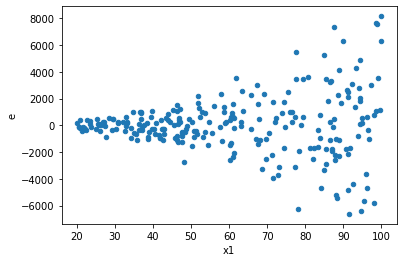

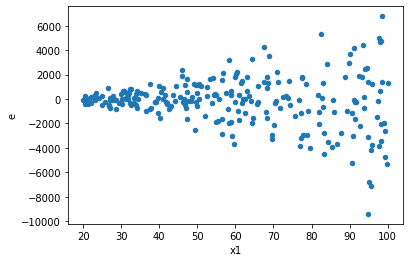

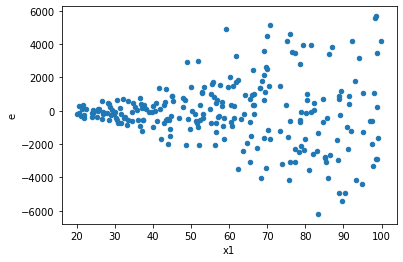

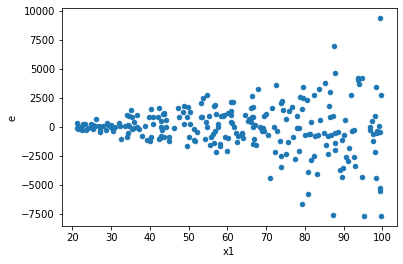

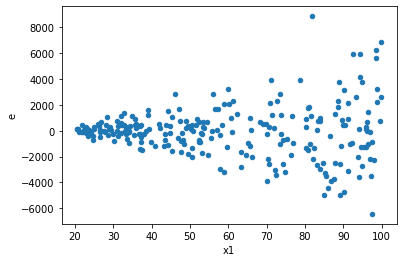

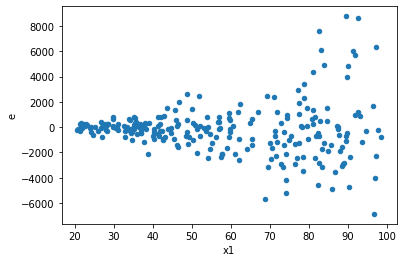

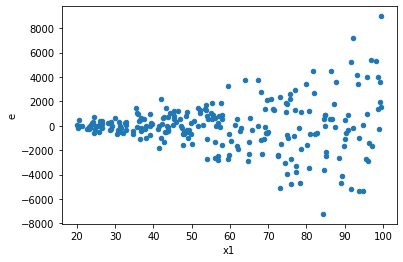

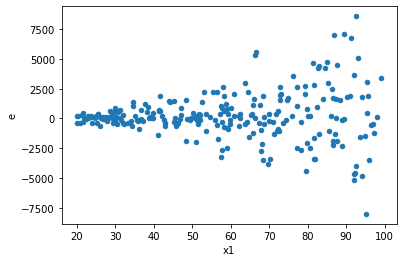

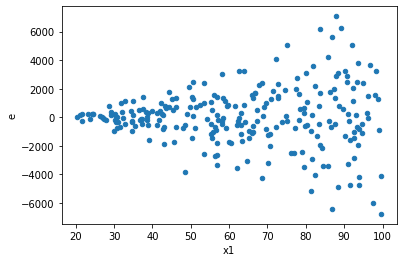

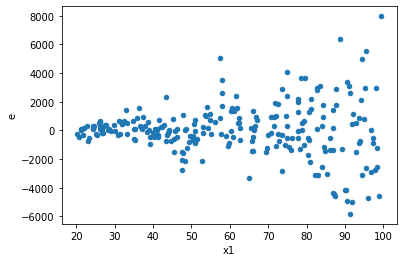

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,99.0,99.0,42362883.25178272,834166566.4997642,427907.91163416894,8425924.914139032,19.690977158988833,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
2.0,99.0,99.0,57840341.650015526,807089250.2821298,584245.8752526821,8152416.669516462,13.953742790209002,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
3.0,99.0,99.0,35486196.878007114,799660861.9883105,358446.433111183,8077382.444326368,22.534419924945727,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
4.0,99.0,99.0,75640229.89735943,1057673395.2996899,764042.7262359539,10683569.649491817,13.982947919842491,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
5.0,99.0,99.0,48318083.05721834,986686946.8961267,488061.4450224075,9966534.817132594,20.42065588007063,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
6.0,99.0,99.0,69799309.53440616,836551229.8879365,705043.5306505673,8450012.42311047,11.985093197455994,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
8.0,99.0,99.0,37666898.13480158,863025740.7253993,380473.7185333493,8717431.724498982,22.912047008405604,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
9.0,99.0,99.0,49816665.74347544,697253347.9555197,503198.6438734893,7042963.110661815,13.99638730431974,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
10.0,99.0,99.0,43760427.44621042,1072675721.5922946,442024.51965869113,10835108.298912067,24.512459868240764,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,99.0,99.0,42362883.25178272,834166566.4997642,427907.91163416894,8425924.914139032,19.690977158988833,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
1.0,99.0,99.0,1110916411.4620504,48292538.420320295,11221377.893556066,487803.4183870737,0.043470901970710504,3.1859820878888903e-41,Reject005=0 : Heteroscedasticity
2.0,99.0,99.0,57840341.650015526,807089250.2821298,584245.8752526821,8152416.669516462,13.953742790209002,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
3.0,99.0,99.0,35486196.878007114,799660861.9883105,358446.433111183,8077382.444326368,22.534419924945727,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
4.0,99.0,99.0,75640229.89735943,1057673395.2996899,764042.7262359539,10683569.649491817,13.982947919842491,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,99.0,99.0,48318083.05721834,986686946.8961267,488061.4450224075,9966534.817132594,20.42065588007063,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,99.0,99.0,69799309.53440616,836551229.8879365,705043.5306505673,8450012.42311047,11.985093197455994,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,99.0,99.0,769147682.9120739,48586233.75423713,7769168.514263372,490770.0379215872,0.06316892689617754,5.623476317710702e-34,Reject005=0 : Heteroscedasticity
8.0,99.0,99.0,37666898.13480158,863025740.7253993,380473.7185333493,8717431.724498982,22.912047008405604,2.220446049250313e-16,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64